# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# READING THE DATASET

In [2]:
df = pd.read_csv('dataset/Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# REMOVING UNWANTED COLUMNS

In [4]:
df.drop(["Serial No."],axis = 1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# VIEWING DESCRIPTIVE STATISTICS OF THE DATASET

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# HANDLING MISSING VALUES IN THE DATASET

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# VISUALISATIONS

# UNIVARIANTE VISUALISATION

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

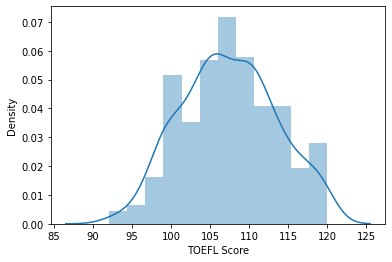

In [8]:
sns.distplot(df['TOEFL Score'])

[]

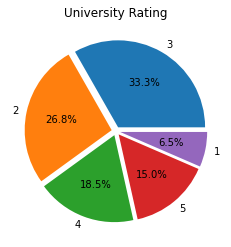

In [9]:
plt.pie(df['University Rating'].value_counts(),[0.05,0.05,0.05,0.05,0.05],df['University Rating'].value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.plot()

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Research'>

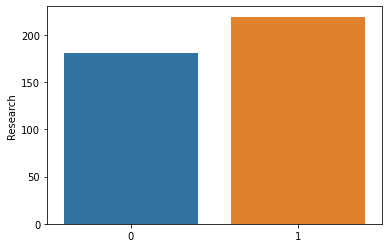

In [10]:
sns.barplot(df.Research.value_counts().index,df.Research.value_counts())

# BIVARIANTE ANALYSIS

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

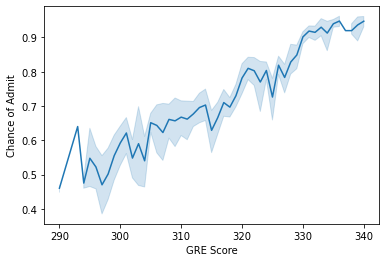

In [11]:
sns.lineplot(df['GRE Score'],df['Chance of Admit'])

In [12]:
def countplot_2(x,hue,title=None,figsize=(12,10)):
    plt.figure(figsize=figsize)
    sns.countplot(data = df[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.plot()

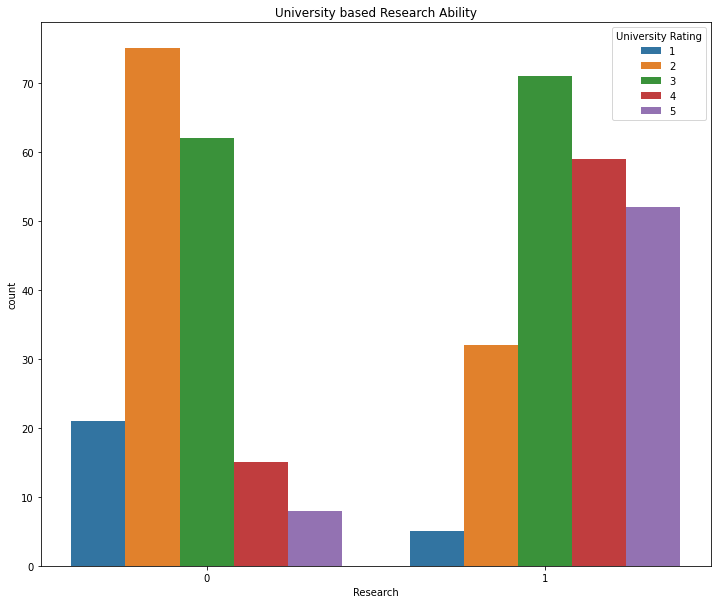

In [13]:
countplot_2('Research','University Rating','University based Research Ability')

# MULTIVARIANTE ANALYSIS

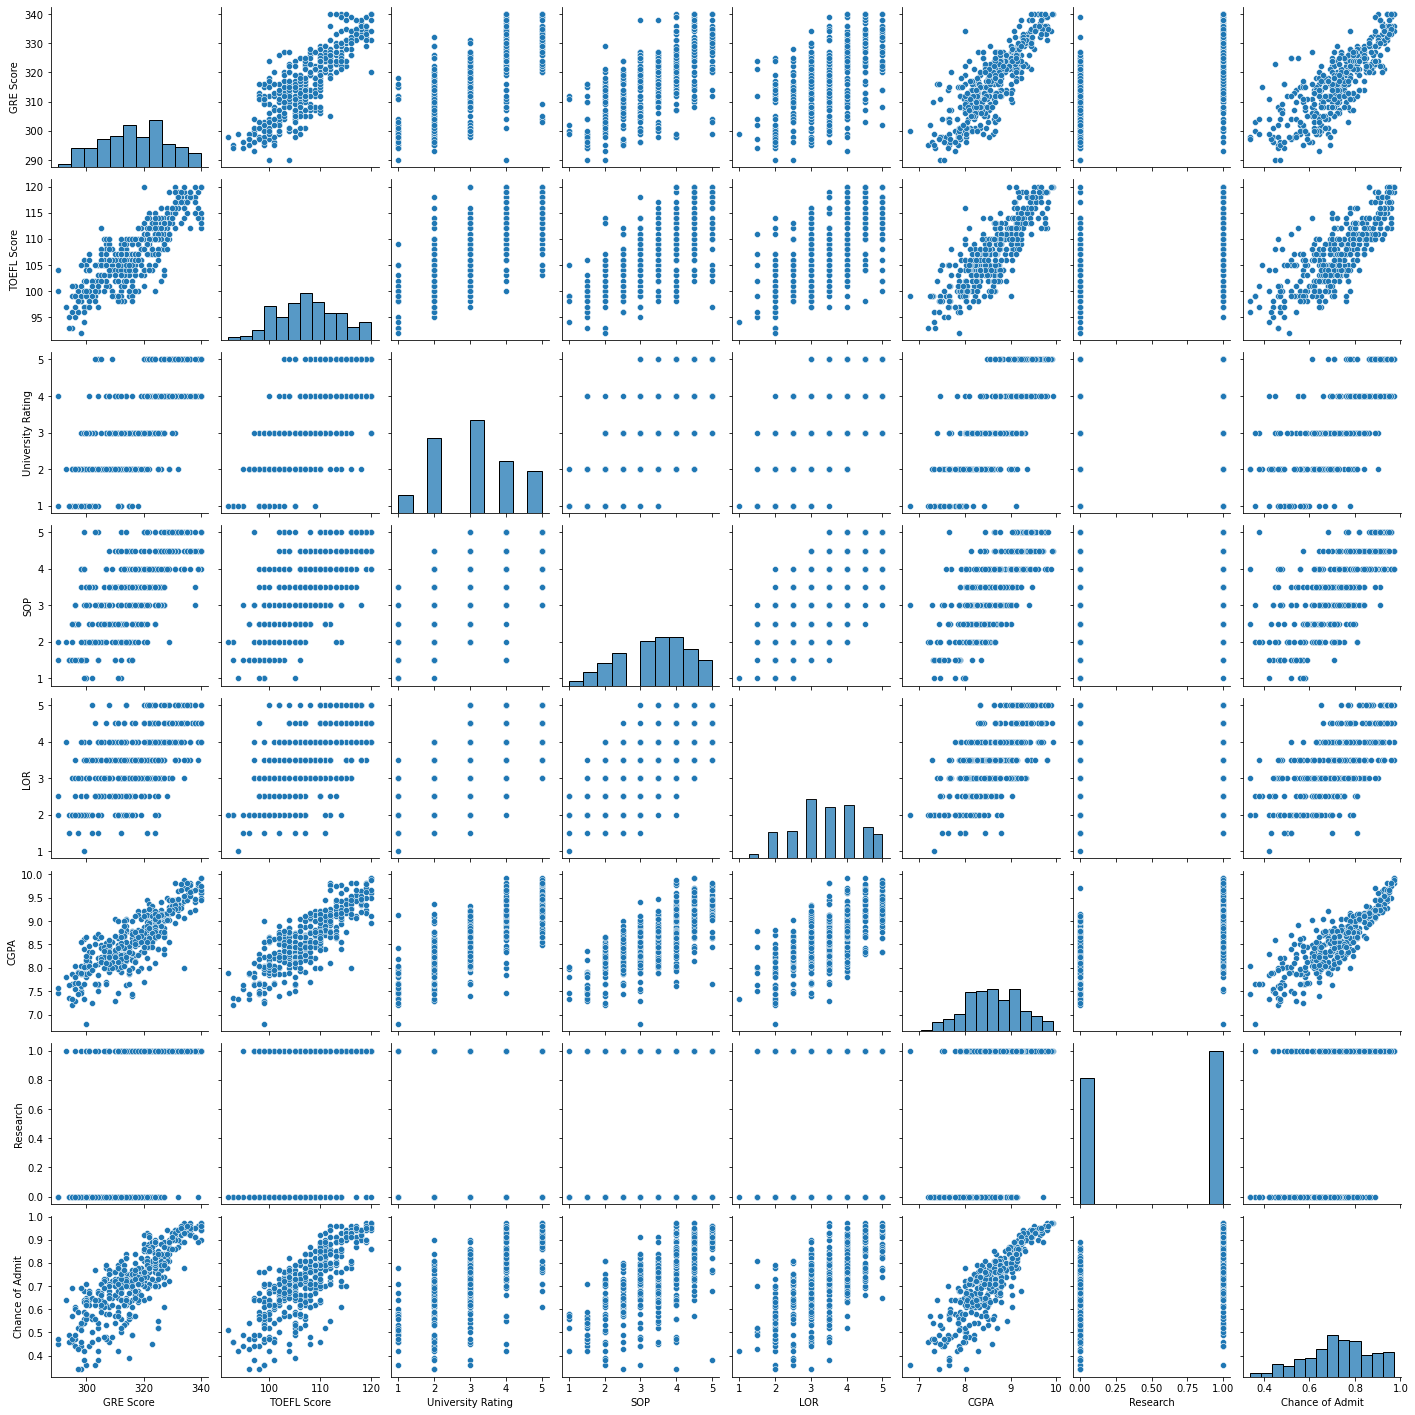

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


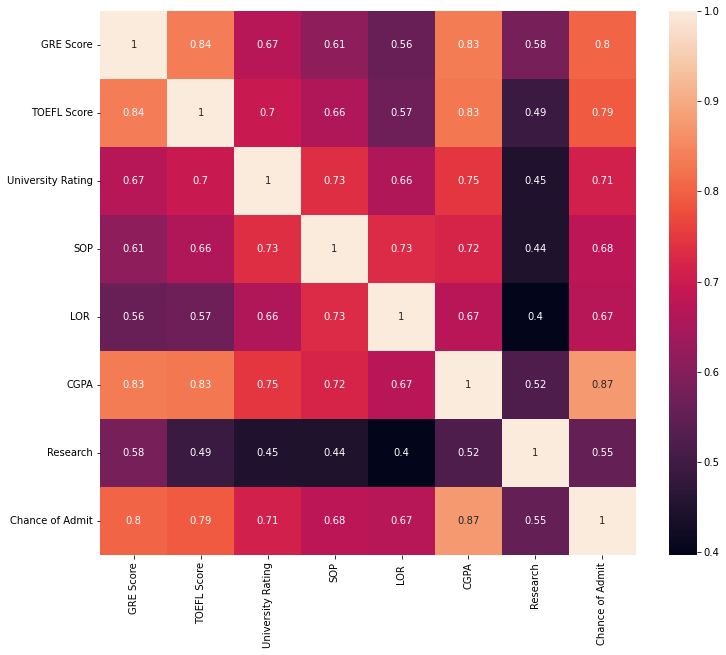

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# FIND THE OUTLIERS AND REPLACE THEM

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


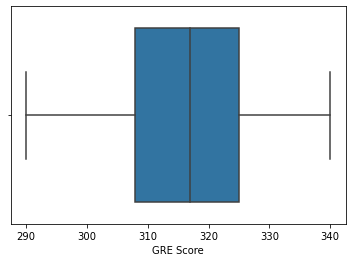

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


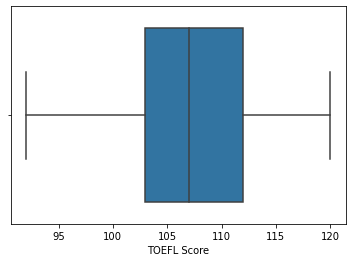

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


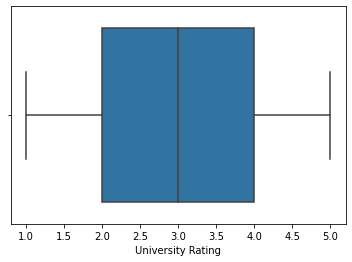

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


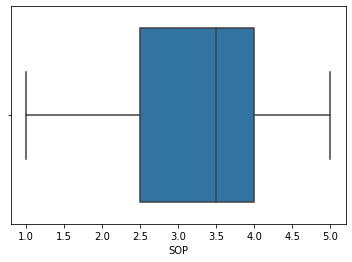

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


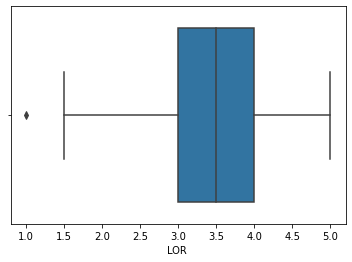

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


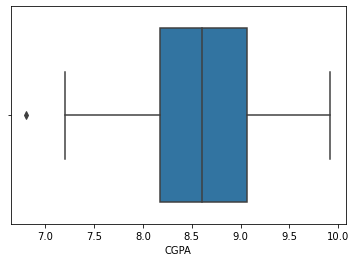

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


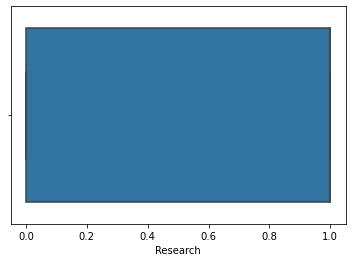

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


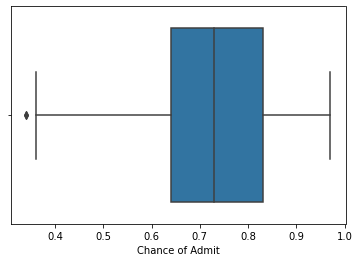

In [17]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [18]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[i] = np.where(df[i]>=upper_limit,Q3 + (1.5*IQR),df[i])
    df[i] = np.where(df[i]<=lower_limit,Q1 - (1.5*IQR),df[i])

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


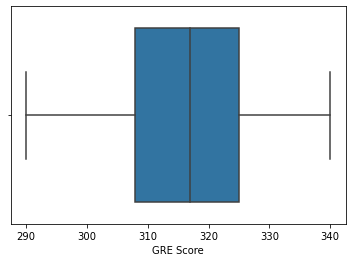

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


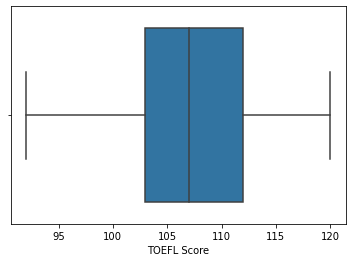

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


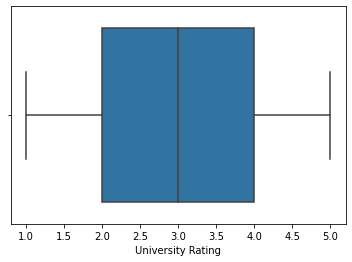

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


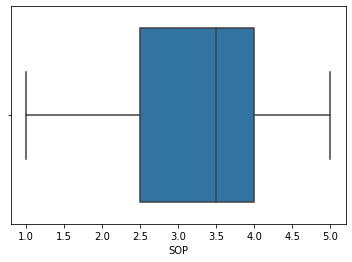

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


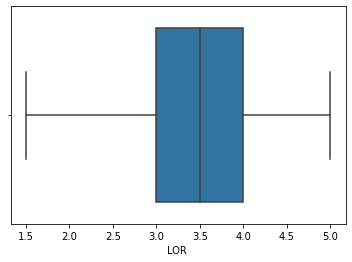

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


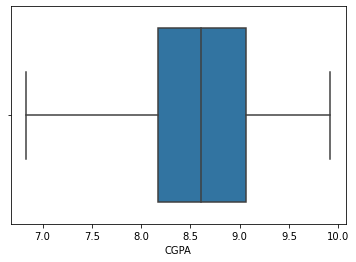

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


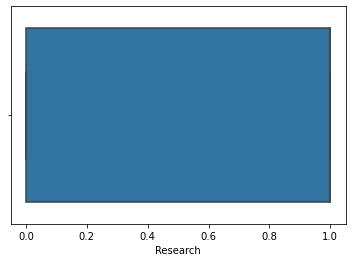

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


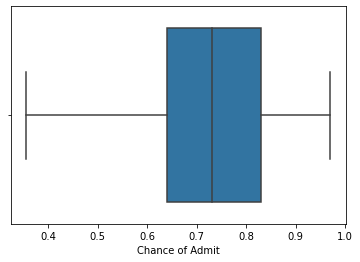

In [19]:
for i in  df.columns:
    sns.boxplot(df[i])
    plt.show()

# ENCODING
**The Dataset has all columns in Numerical Format. So , Encoding is not Required**

# SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT  VARIABLES

In [20]:
X = df.drop(columns=['Chance of Admit'])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0
...,...,...,...,...,...,...,...
395,324.0,110.0,3.0,3.5,3.5,9.04,1.0
396,325.0,107.0,3.0,3.0,3.5,9.11,1.0
397,330.0,116.0,4.0,5.0,4.5,9.45,1.0
398,312.0,103.0,3.0,3.5,4.0,8.78,0.0


In [21]:
Y = df['Chance of Admit']
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

# SCALING THE DATA

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_Scaled = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
X_Scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.857143,0.912586,1.0
1,0.68,0.535714,0.75,0.750,0.857143,0.660057,1.0
2,0.52,0.428571,0.50,0.500,0.571429,0.378389,1.0
3,0.64,0.642857,0.50,0.625,0.285714,0.595306,1.0
4,0.48,0.392857,0.25,0.250,0.428571,0.446378,0.0
...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.571429,0.715095,1.0
396,0.70,0.535714,0.50,0.500,0.571429,0.737758,1.0
397,0.80,0.857143,0.75,1.000,0.857143,0.847835,1.0
398,0.44,0.392857,0.50,0.625,0.714286,0.630919,0.0


# SPLITTING INTO TRAINING AND TESTING DATASET

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,Y,test_size = 0.2,random_state=0)

# BUILD THE MODEL

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# TRAIN THE MODEL

In [25]:
model.fit(x_train,y_train)

LinearRegression()

# TEST THE MODEL

In [26]:
y_predict = model.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_predict.round(2)})

,Actual,Predicted
132,0.71,0.70
309,0.70,0.69
341,0.79,0.78
196,0.73,0.62
246,0.72,0.72
...,...,...
14,0.61,0.63
363,0.69,0.64
304,0.62,0.65
361,0.93,0.91


# EVALUATE THE PERFORMANCE OF MODEL USING METRICS

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7355580810993159